In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [5]:
from google.colab import drive
drive.mount('/content/drive')

# Define dataset paths (update these if your folders are different)
fire_path = '/content/drive/My Drive/fire_dataset/fire_images'
non_fire_path = '/content/drive/My Drive/fire_dataset/non_fire_images'


Mounted at /content/drive


In [6]:
# Set image size
IMG_SIZE = 128

# Lists to store images and labels
data = []
labels = []

# Load fire images
for file in os.listdir(fire_path):
    img_path = os.path.join(fire_path, file)
    img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img = img_to_array(img) / 255.0  # Normalize
    data.append(img)
    labels.append(1)  # fire

# Load non-fire images
for file in os.listdir(non_fire_path):
    img_path = os.path.join(non_fire_path, file)
    img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img = img_to_array(img) / 255.0  # Normalize
    data.append(img)
    labels.append(0)  # non-fire

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)


In [7]:
# One-hot encode the labels (not mandatory for binary but good practice)
labels = to_categorical(labels, num_classes=2)

# Split data: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.3, random_state=42, shuffle=True
)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 699, Testing samples: 300


In [8]:
model = Sequential()

# First Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Prevent overfitting
model.add(Dense(2, activation='softmax'))  # 2 classes: fire, non-fire


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test)
)

print("✅ Model training complete!")


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 300ms/step - accuracy: 0.7494 - loss: 0.5774 - val_accuracy: 0.9300 - val_loss: 0.1984
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9187 - loss: 0.1959 - val_accuracy: 0.9467 - val_loss: 0.1282
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9558 - loss: 0.1509 - val_accuracy: 0.9267 - val_loss: 0.1599
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9123 - loss: 0.2370 - val_accuracy: 0.9367 - val_loss: 0.1319
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9708 - loss: 0.1064 - val_accuracy: 0.9500 - val_loss: 0.1121
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9675 - loss: 0.1049 - val_accuracy: 0.9600 - val_loss: 0.0894
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9818 - loss: 0.0717 - val_accuracy: 0.9333 - val_loss: 0.1431
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9706 - loss: 0.0820 - val_accuracy: 0.9700 

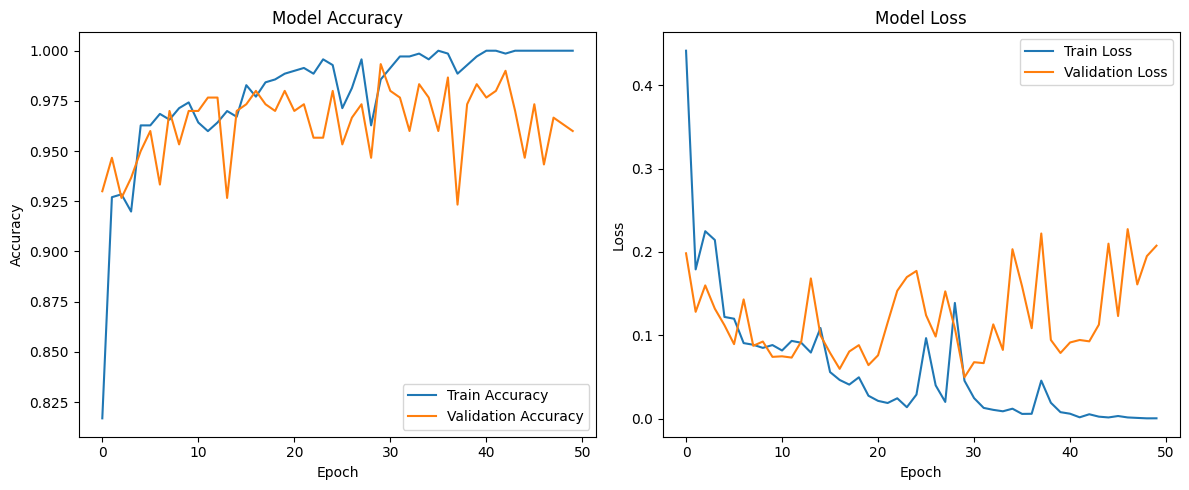

In [10]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
plt.savefig('training_curve.png')


<Figure size 640x480 with 0 Axes>

In [11]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"🔥 Test Accuracy: {accuracy * 100:.2f}%")


🔥 Test Accuracy: 93.67%


In [12]:
from tensorflow.keras.preprocessing import image

def test_single_image(img_path):
    # Load and preprocess the image
    img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Model expects batch

    # Predict
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)

    # Class label
    class_label = "🔥 Fire" if class_index == 1 else "❄️ Non-Fire"
    print(f"Prediction: {class_label} (Confidence: {prediction[0][class_index]*100:.2f}%)")

    # Show image
    plt.imshow(img)
    plt.title(class_label)
    plt.axis('off')
    plt.show()


In [14]:
from google.colab import drive
drive.mount('/content/drive')

# Define dataset paths (update these if your folders are different)
fire_path = '/content/drive/My Drive/fire_dataset/fire_images'
non_fire_path = '/content/drive/My Drive/fire_dataset/non_fire_images'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Example paths (adjust if needed)
fire_img_path = '/content/drive/My Drive/fire_dataset/fire_images/fire.50.png'
non_fire_img_path = '/content/drive/My Drive/fire_dataset/non_fire_images/non_fire.200.png'


In [16]:
def test_single_image(img_path):
    img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_label = "🔥 Fire" if class_index == 1 else "❄️ Non-Fire"

    print(f"Prediction: {class_label} (Confidence: {prediction[0][class_index]*100:.2f}%)")

    plt.imshow(img)
    plt.title(class_label)
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step
Prediction: 🔥 Fire (Confidence: 100.00%)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


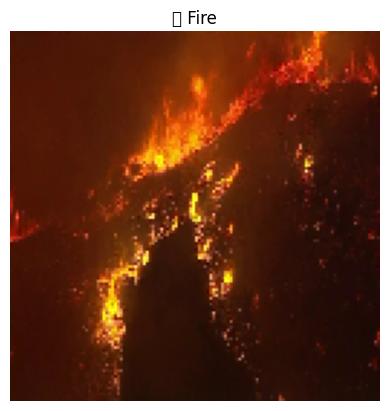

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: ❄️ Non-Fire (Confidence: 100.00%)


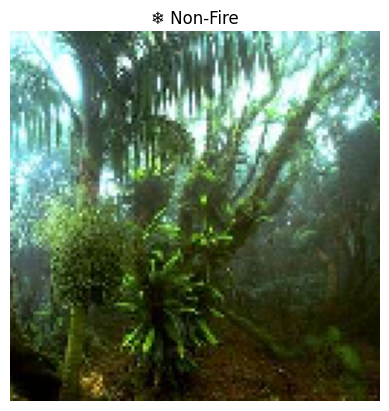

In [17]:
test_single_image(fire_img_path)
test_single_image(non_fire_img_path)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


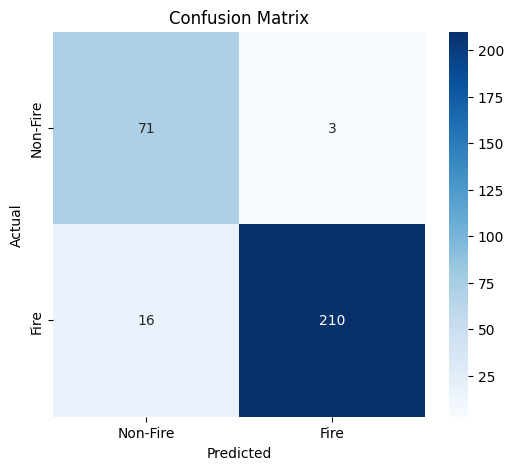


Classification Report:

              precision    recall  f1-score   support

    Non-Fire       0.82      0.96      0.88        74
        Fire       0.99      0.93      0.96       226

    accuracy                           0.94       300
   macro avg       0.90      0.94      0.92       300
weighted avg       0.94      0.94      0.94       300



In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fire', 'Fire'],
            yticklabels=['Non-Fire', 'Fire'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=['Non-Fire', 'Fire']))
